In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


In [ ]:
#@title
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='	')
data.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
#@title
print("1. Количество наблюдений: " + str(data['order_id'].count()))

1. Количество наблюдений: 4622


In [ ]:
#@title
print("2. Названия столбцов")
data.columns

2. Названия столбцов


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
#@title
agg_data =  data.groupby(['item_name'])['quantity'].sum()
max_count = agg_data.max()
max_item = agg_data[agg_data == max_count].index.tolist()
print("3. Частая позиция в заказе: " + str(max_item))

3. Частая позиция в заказе: ['Chicken Bowl']


4. Построить гистрограмму частоты заказов по позициям (item )


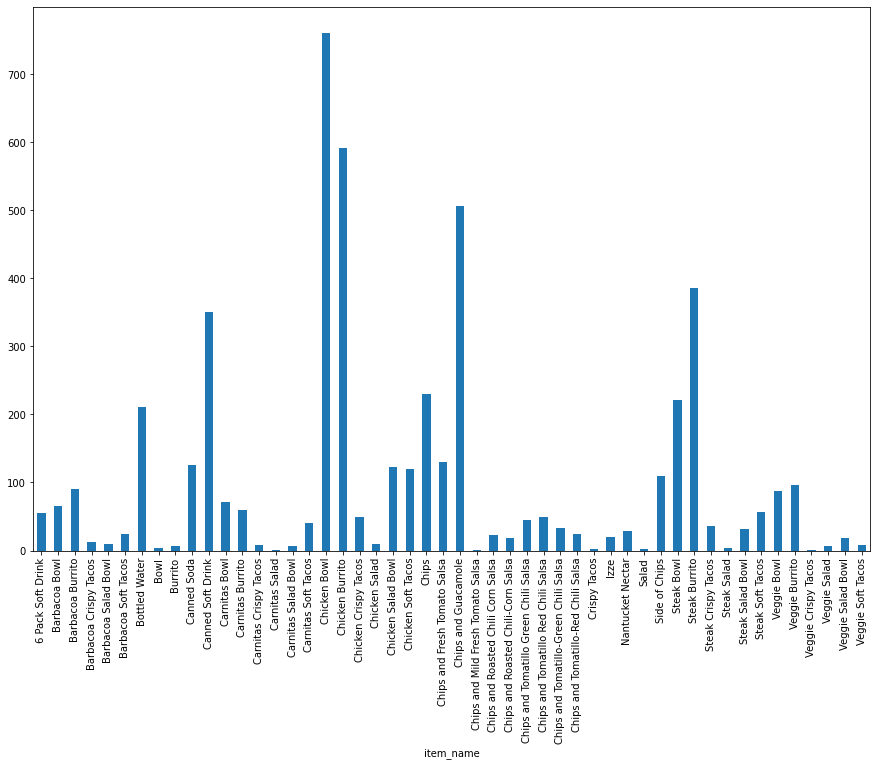

In [ ]:
#@title
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
data.groupby(['item_name']).sum()['quantity'].plot.bar()
plt.show()

5. Измените тип переменной item_price c с помощью лямбды функции

In [ ]:
#@title
data['item_price'] = data['item_price'].apply(lambda x: pd.to_numeric(x[1:]))
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

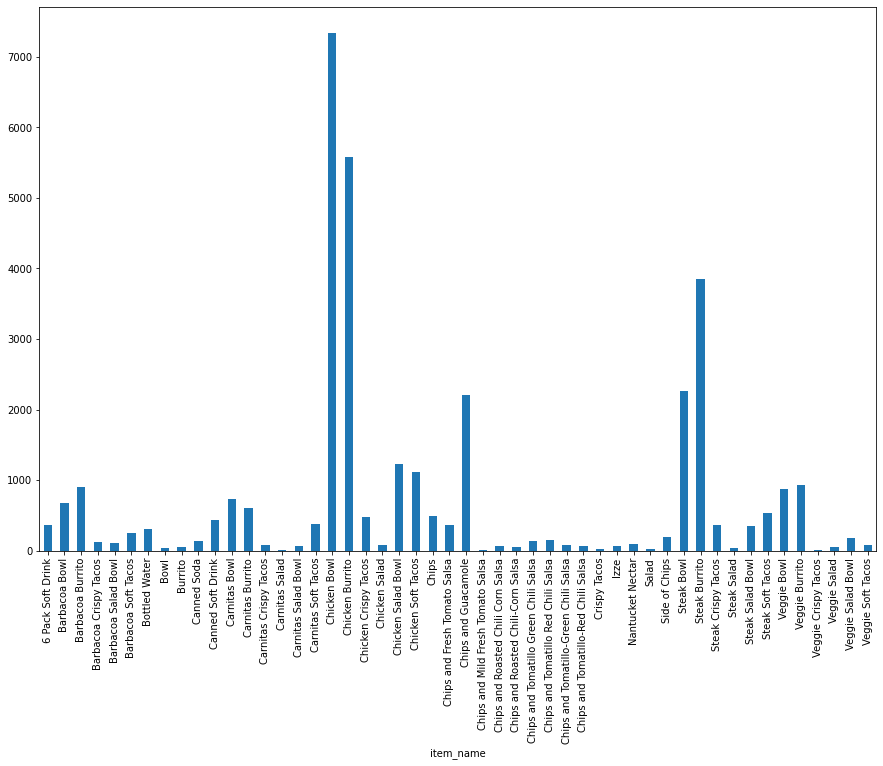

In [ ]:
#@title
plt.figure(figsize=(15, 10))
data.groupby(['item_name'])['item_price'].sum().plot.bar()
plt.show()

7. Средняя сумма заказа? (минимум 2 способа)

In [ ]:
#@title
order_sum = data.groupby(['order_id'])['item_price'].sum()
print(order_sum.mean())
print(order_sum.sum()/order_sum.count())

18.81142857142869
18.811428571428568


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [ ]:
#@title
# 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
types_in_order = data.groupby(['order_id'])['item_name'].nunique()
types_agg = types_in_order.agg(['mean','min','max','median'])
print(types_agg)

mean      2.34024
min       1.00000
max       8.00000
median    2.00000
Name: item_name, dtype: float64


9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [ ]:
#@title


order_with_steak = data[data['item_name'].str.contains('Steak')]
order_with_steak['roast'] = order_with_steak['choice_description'].apply(lambda x: 'Mild' if 'Mild' in x else 'Medium' if 'Medium' in x else 'Hot' if 'Hot' in x else 'NaN')
order_with_steak.head(20)
order_with_steak.groupby(['item_name'])['quantity','item_price'].describe()

quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [ ]:
#@title
order_with_steak.groupby(['roast'])['quantity','item_price'].describe()

quantity                                ... item_price                          
          count      mean       std  min  25%  ...        min   25%   50%    75%    max
roast                                          ...                                     
Hot        46.0  1.043478  0.206185  1.0  1.0  ...       8.69  8.99  8.99   8.99  17.98
Medium     86.0  1.058140  0.280950  1.0  1.0  ...       8.69  8.99  8.99   8.99  26.07
Mild      105.0  1.038095  0.192344  1.0  1.0  ...       8.69  8.99  8.99  11.08  22.16
NaN       465.0  1.045161  0.227674  1.0  1.0  ...       8.69  9.25  9.39  11.75  27.75

[4 rows x 16 columns]

10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [ ]:
#@title
data['item_price_rubble'] = round(data['item_price'] * 72,2)
data.head(5)

,order_id,quantity,item_name,choice_description,item_price,item_price_rubble
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,172.08
1,1,1,Izze,[Clementine],3.39,244.08
2,1,1,Nantucket Nectar,[Apple],3.39,244.08
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,172.08
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1222.56


11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [ ]:
#@title
data['new_item'] = data[['choice_description','item_name']].apply(lambda x:  x[1] if not 'Steak' in x[1] else  'Steak Mild' if 'Mild' in x[0] else 'Steak Medium' if 'Medium' in x[0] else 'Steak Hot' if 'Hot' in x[0] else 'Steak NaN' , axis = 1)
data.groupby('new_item')['quantity'].sum()


new_item
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123
C

12. Определить цену по каждой позиции в отдельности.

In [ ]:
#@title
data['price_per_item'] = data['item_price'] / data['quantity']
data[['item_name','price_per_item']].drop_duplicates(subset=['item_name'])

,item_name,price_per_item
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,8.49
6,Side of Chips,1.69
7,Steak Burrito,11.75
8,Steak Soft Tacos,9.25
10,Chips and Guacamole,4.45
11,Chicken Crispy Tacos,8.75


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [ ]:
!pip install umap-learn


In [ ]:
import pandas as pd
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ImportError: ignored

In [ ]:
mnist = "https://www.openml.org/data/get_csv/52667/mnist_784.arff"
mnist_data = pd.read_csv(mnist)
plt.figure(figsize=(10, 10))
print("UMAP")
MNIST_e = umap.fit_transform(mnist_data[:20000].drop('class', axis=1))
plt.scatter(MNIST_e[:,0], MNIST_e[:,1], c=mnist_data[:20000]['class'], cmap="plasma", s=2)
plt.show()

print("PCA")
plt.figure(figsize=(10, 10))
MNIST_e = PCA(n_components=2).fit_transform(mnist_data[:20000].drop('class', axis=1))
plt.scatter(MNIST_e[:,0], MNIST_e[:,1], c=mnist_data[:20000]['class'], cmap="plasma", s=2)
plt.show()


coil_20_data = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')
plt.figure(figsize=(10, 10))
print("UMAP")
coil_e = UMAP().fit_transform(coil_20_data.drop('1024', axis=1))
plt.scatter(coil_e [:,0], coil_e [:,1], c=coil_20_data['1024'], cmap="plasma", s=2)

plt.show()




UMAP


AttributeError: ignored

<Figure size 720x720 with 0 Axes>